# Abstract

This analysis examines how lottery and non-lottery NBA draft picks compare with one another. Addtionally, this report focused on each team's WinShares and Average Plus/Minus by lottery and non-lottery picks. WinShares are a combination of Offensive and Defensive WinShares. Plus/Minus measures a player's productivity on the court. Positive numbers indicate that the player helped increase their respective team's lead or decrease the deficit. A minus indicates that the deficit increased or the team's lead decreased. Other stats used to compare lottery and non-lottery picks include the averages of WinShares, total minutes, field goal percentage, career games played, points, and rebounds. 

When comparing each team's WinShares among lottery picks, the San Antonio Spurs and Oklahoma City Thunder had the highest WinShares, while the New York Knicks and Sacramento Kings had the lowest. Among non-lottery picks, San Antonio and Cleveland Cavaliers had the highest WinShares, while the Atlanta Hawks and Dallas Mavericks had the lowest. San Antonio also ranked in the top two in average points for lottery and non-lottery picks. This suggests that the Spurs have had the most success developing players that are both lottery and non-lottery picks. Other teams should adopt the Spurs' player development system in order increase their WinShares among lottery and non-lottery picks. 

With the exception of field goal percentage, lottery picks outperformed non-lottery picks by wide margins in every category. The average WinShare for lottery pick players was close to 35, while non-lottery players had an average of 12. Lottery players outperformed non-lottery players in points, rebounds, minutes, and games played. Surprisingly, both lottery and non-lottery picks had negative plus/minus numbers, but non-lottery picks were 2 points worse. Lottery picks slightly outperformed non-lottery picks in field goal percentage. Overall, teams have more success with lottery picks. However, teams should follow San Antonio's player development system. 

# Introduction

NBA teams that "tank" the regular season in order to get a lottery draft pick has been an ongoing topic of discussion. "Tanking" means purposefully not trying your best to win games in order to increase the odds of obtaining a lottery pick for the chance to win the 1st pick in the NBA Draft lottery. The rationale for this strategy is that players picked in the lottery helps the future prospects of the team when it comes to winning. While only 1 team can win the lottery, having a draft lottery pick that is from 2 and 14 is thought to help increase the future aspirations of teams who haven't had luck winning games. By exploring this dataset, I hope to uncover any findings that may indicate whether or not this strategy of "tanking" is worthwhile.

How do lottery picks affect WinShares compared with non-lottery picks? Do players picked in the lottery play more minutes, score more points, and ultimately win more games? Additionally, which teams have had high WinShares with lottery and non-lottery picks?

There are 1,868 observations in the dataset, with 24 columns. Each observation represents a NBA player who was drafted between 1990 and 2021. Players who have missing data were drafted but did not play in the NBA, and were removed from the dataset.

I found this dataset on Kaggle: https://www.kaggle.com/datasets/benwieland/nba-draft-data

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/moham6839/Data602_Final_Project/main/draft-data-20-years.csv")

In [3]:
df.head()

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


In [4]:
df.describe()

,Unnamed: 0,Rk,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,WS,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,DraftYear
count,1868.00000,1868.000000,1868.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1616.000000,...,1621.000000,1620.000000,1620.000000,1621.000000,1868.000000,1621.000000,1621.000000,1621.000000,1621.000000,1868.000000
mean,934.50000,29.758030,29.758030,6.305367,342.477483,8250.098705,3511.962369,1477.016656,754.235657,0.435562,...,17.576373,0.061087,-2.333457,4.318816,2005.789079,18.040592,7.218692,3.186243,1.531215,2005.789079
std,539.38947,16.945052,16.945052,4.640924,322.947374,9765.177283,4788.948725,1993.300685,1266.295204,0.084803,...,27.862566,0.096265,4.165910,11.404481,9.170436,8.730546,4.970593,2.091627,1.472497,9.170436
min,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.900000,-1.264000,-52.000000,-8.500000,1990.000000,0.000000,0.000000,0.000000,0.000000,1990.000000
25%,467.75000,15.000000,15.000000,2.000000,69.000000,792.000000,253.000000,123.000000,43.000000,0.403000,...,0.400000,0.030000,-3.900000,-0.400000,1998.000000,10.800000,3.300000,1.700000,0.500000,1998.000000
50%,934.50000,30.000000,30.000000,5.000000,230.000000,4000.000000,1516.000000,635.000000,250.000000,0.435000,...,4.900000,0.069000,-2.000000,0.000000,2006.000000,17.600000,6.100000,2.800000,1.000000,2006.000000
75%,1401.25000,44.000000,44.000000,10.000000,575.000000,13026.000000,5081.000000,2093.000000,896.000000,0.473000,...,23.800000,0.103000,-0.300000,4.300000,2014.000000,24.900000,9.900000,4.200000,2.000000,2014.000000
max,1868.00000,60.000000,60.000000,22.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,...,248.300000,1.442000,51.100000,141.400000,2021.000000,41.100000,27.100000,13.400000,9.500000,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1868 non-null   int64  
 1   Rk          1868 non-null   int64  
 2   Pk          1868 non-null   int64  
 3   Tm          1868 non-null   object 
 4   Player      1868 non-null   object 
 5   College     1533 non-null   object 
 6   Yrs         1621 non-null   float64
 7   G           1621 non-null   float64
 8   TOTMP       1621 non-null   float64
 9   TOTPTS      1621 non-null   float64
 10  TOTTRB      1621 non-null   float64
 11  TOTAST      1621 non-null   float64
 12  FG%         1616 non-null   float64
 13  3P%         1500 non-null   float64
 14  FT%         1584 non-null   float64
 15  WS          1621 non-null   float64
 16  WS/48       1620 non-null   float64
 17  BPM         1620 non-null   float64
 18  VORP        1621 non-null   float64
 19  DraftYr     1868 non-null  

## Modifying Multiple Columns

In [6]:
df.rename({"Pk": "Pick", "Tm": "Team", "G": "Games Played", "Yrs": "Years", 
           "WS": "WinShares", "MPG": "Average_Minutes Per Game", 
           "BPM": "Plus_Minus", "TOTPTS": "Points", "FG%": "Field_Goal_Pct", 
           "TOTMP": "Total_Minutes", "PPG": "Average_Points_PG", 
           "RPG": "Average_Rebounds_PG", "TOTTRB": "Total_Rebounds", "TOTAST": "Total_Assists"}, axis=1, inplace=True)
df.head()

,Unnamed: 0,Rk,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,...,WS/48,Plus_Minus,VORP,DraftYr,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


## Fixing Missing Data in College Column

Since not all players who were drafted attended college, I filled in missing values in the College column for those players:

In [7]:
print(df.isnull().sum())

Unnamed: 0                    0
Rk                            0
Pick                          0
Team                          0
Player                        0
College                     335
Years                       247
Games Played                247
Total_Minutes               247
Points                      247
Total_Rebounds              247
Total_Assists               247
Field_Goal_Pct              252
3P%                         368
FT%                         284
WinShares                   247
WS/48                       248
Plus_Minus                  248
VORP                        247
DraftYr                       0
Average_Minutes Per Game    247
Average_Points_PG           247
Average_Rebounds_PG         247
APG                         247
playerurl                   335
DraftYear                     0
dtype: int64


In [8]:
fillna_new_df = df
fillna_new_df.College.fillna("No College", inplace=True)
fillna_new_df.Years.fillna(0, inplace=True)
fillna_new_df.head()

,Unnamed: 0,Rk,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,...,WS/48,Plus_Minus,VORP,DraftYr,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


## Dropping Columns

In [9]:
fillna_new_df.drop(["DraftYr", "Rk", "playerurl", "VORP", "WS/48", "Unnamed: 0"], axis=1, inplace=True)
fillna_new_df

,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,Total_Rebounds,Total_Assists,Field_Goal_Pct,3P%,FT%,WinShares,Plus_Minus,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,DraftYear
0,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,64.3,1.4,33.2,16.5,9.3,2.5,1990
1,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,145.5,3.3,35.3,16.3,3.9,6.7,1990
2,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,25.2,-0.8,26.7,14.6,1.9,3.5,1990
3,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,33.4,0.2,28.6,12.9,2.8,2.1,1990
4,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,47.8,0.1,30.5,13.4,4.1,3.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,56,CHA,Scottie Lewis,Florida,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.500,0.0,6.1,3.5,0.5,0.0,0.5,2021
1864,57,CHA,Balša Koprivica,Florida State,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
1865,58,NYK,Jericho Sims,Texas,1.0,18.0,117.0,19.0,27.0,1.0,0.727,NaN,0.750,0.4,-0.6,6.5,1.1,1.5,0.1,2021
1866,59,BRK,RaiQuan Gray,Florida State,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


## Dropping Rows with Missing Data

In [10]:
fillna_new_df.dropna(axis=0, inplace=True)
fillna_new_df

,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,Total_Rebounds,Total_Assists,Field_Goal_Pct,3P%,FT%,WinShares,Plus_Minus,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,DraftYear
0,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,64.3,1.4,33.2,16.5,9.3,2.5,1990
1,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,145.5,3.3,35.3,16.3,3.9,6.7,1990
2,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,25.2,-0.8,26.7,14.6,1.9,3.5,1990
3,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,33.4,0.2,28.6,12.9,2.8,2.1,1990
4,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,47.8,0.1,30.5,13.4,4.1,3.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,52,DET,Luka Garza,Iowa,1.0,29.0,340.0,151.0,87.0,16.0,0.444,0.341,0.643,0.5,-3.4,11.7,5.2,3.0,0.6,2021
1860,53,PHI,Charles Bassey,Western Kentucky,1.0,23.0,168.0,69.0,62.0,7.0,0.638,0.000,0.750,0.8,1.9,7.3,3.0,2.7,0.3,2021
1861,54,IND,Sandro Mamukelashvili,Seton Hall,1.0,34.0,315.0,102.0,60.0,16.0,0.459,0.385,0.750,0.7,-0.8,9.3,3.0,1.8,0.5,2021
1862,55,OKC,Aaron Wiggins,Maryland,1.0,34.0,762.0,243.0,115.0,38.0,0.464,0.307,0.706,1.2,-2.9,22.4,7.1,3.4,1.1,2021


In [11]:
print(fillna_new_df.isnull().sum())

Pick                        0
Team                        0
Player                      0
College                     0
Years                       0
Games Played                0
Total_Minutes               0
Points                      0
Total_Rebounds              0
Total_Assists               0
Field_Goal_Pct              0
3P%                         0
FT%                         0
WinShares                   0
Plus_Minus                  0
Average_Minutes Per Game    0
Average_Points_PG           0
Average_Rebounds_PG         0
APG                         0
DraftYear                   0
dtype: int64


## Creating New Column for Lottery and Non-Lottery Picks

During the time period of this dataset, there have been two occasions when the number of teams in the lottery increased due to the creation of new teams. Using Basketball Reference as a guide, I configured the correct lottery picks for each of the years in the dataset, and created a column for players who were lottery picks and not lottery picks: 

In [12]:
def Lottery(df):
    df.loc[(df['DraftYear'] >= 2004) & (df['Pick'] <=14),'Lottery_Pick'] = "Lottery"
    df.loc[(df['DraftYear'] <=2003) & (df['Pick'] <= 13), 'Lottery_Pick'] = "Lottery"
    df.loc[(df['DraftYear'] <=1994) & (df['Pick'] <= 11),'Lottery_Pick'] = "Lottery"
    #df.loc[(df['DraftYear'] <= 2000) & (df['Pick'] < ),'Lottery_Pick'] = 1
    df['Lottery_Pick'].fillna("No", inplace=True)

In [13]:
Lottery(fillna_new_df)

In [14]:
fillna_new_df["Lottery_Pick"] = fillna_new_df["Lottery_Pick"].replace([0], "Non")

In [15]:
fillna_new_df.head()

,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,Total_Rebounds,Total_Assists,...,3P%,FT%,WinShares,Plus_Minus,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,DraftYear,Lottery_Pick
0,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,1985.0,...,0.295,0.769,64.3,1.4,33.2,16.5,9.3,2.5,1990,Lottery
1,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,...,0.317,0.729,145.5,3.3,35.3,16.3,3.9,6.7,1990,Lottery
2,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,1087.0,2079.0,...,0.354,0.905,25.2,-0.8,26.7,14.6,1.9,3.5,1990,Lottery
3,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,1774.0,1296.0,...,0.397,0.793,33.4,0.2,28.6,12.9,2.8,2.1,1990,Lottery
4,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,4002.0,2945.0,...,0.300,0.754,47.8,0.1,30.5,13.4,4.1,3.0,1990,Lottery


# Exploratory Data Analysis

To get a better idea of the stats between Lottery and Non-Lottery Picks, I subset the data into 2 separate datasets based on the lottery status of each player:

In [16]:
# filtering for lottery picks
df2 = fillna_new_df.loc[fillna_new_df["Lottery_Pick"] == "Lottery"]
df2

,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,Total_Rebounds,Total_Assists,...,3P%,FT%,WinShares,Plus_Minus,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,DraftYear,Lottery_Pick
0,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,7232.0,1985.0,...,0.295,0.769,64.3,1.4,33.2,16.5,9.3,2.5,1990,Lottery
1,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,...,0.317,0.729,145.5,3.3,35.3,16.3,3.9,6.7,1990,Lottery
2,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,1087.0,2079.0,...,0.354,0.905,25.2,-0.8,26.7,14.6,1.9,3.5,1990,Lottery
3,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,1774.0,1296.0,...,0.397,0.793,33.4,0.2,28.6,12.9,2.8,2.1,1990,Lottery
4,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,4002.0,2945.0,...,0.300,0.754,47.8,0.1,30.5,13.4,4.1,3.0,1990,Lottery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,10,NOP,Ziaire Williams,Stanford,1.0,40.0,861.0,291.0,71.0,35.0,...,0.284,0.760,1.0,-4.2,21.5,7.3,1.8,0.9,2021,Lottery
1818,11,CHA,James Bouknight,UConn,1.0,28.0,296.0,140.0,48.0,23.0,...,0.347,0.871,0.1,-6.7,10.6,5.0,1.7,0.8,2021,Lottery
1819,12,SAS,Joshua Primo,Alabama,1.0,30.0,476.0,147.0,52.0,42.0,...,0.320,0.760,0.1,-4.2,15.9,4.9,1.7,1.4,2021,Lottery
1820,13,IND,Chris Duarte,Oregon,1.0,50.0,1433.0,671.0,205.0,110.0,...,0.364,0.792,1.3,-1.8,28.7,13.4,4.1,2.2,2021,Lottery


In [17]:
# filtering for non-lottery picks
df3 = fillna_new_df.loc[fillna_new_df["Lottery_Pick"] == "No"]
df3

,Pick,Team,Player,College,Years,Games Played,Total_Minutes,Points,Total_Rebounds,Total_Assists,...,3P%,FT%,WinShares,Plus_Minus,Average_Minutes Per Game,Average_Points_PG,Average_Rebounds_PG,APG,DraftYear,Lottery_Pick
13,14,SAC,Travis Mays,Texas,3.0,115.0,2964.0,1273.0,233.0,326.0,...,0.362,0.749,2.4,-2.6,25.8,11.1,2.0,2.8,1990,No
14,15,MIA,Dave Jamerson,Ohio University,3.0,90.0,594.0,306.0,77.0,61.0,...,0.277,0.860,0.2,-3.9,6.6,3.4,0.9,0.7,1990,No
15,16,MIL,Terry Mills,Michigan,11.0,678.0,16422.0,7175.0,3680.0,891.0,...,0.384,0.781,33.3,-0.6,24.2,10.6,5.4,1.3,1990,No
16,17,NYK,Jerrod Mustaf,Maryland,4.0,179.0,1902.0,721.0,452.0,99.0,...,0.000,0.648,1.7,-4.1,10.6,4.0,2.5,0.6,1990,No
17,18,SAC,Duane Causwell,Temple,11.0,541.0,9409.0,2648.0,2273.0,243.0,...,0.286,0.618,15.8,-2.3,17.4,4.9,4.2,0.4,1990,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,52,DET,Luka Garza,Iowa,1.0,29.0,340.0,151.0,87.0,16.0,...,0.341,0.643,0.5,-3.4,11.7,5.2,3.0,0.6,2021,No
1860,53,PHI,Charles Bassey,Western Kentucky,1.0,23.0,168.0,69.0,62.0,7.0,...,0.000,0.750,0.8,1.9,7.3,3.0,2.7,0.3,2021,No
1861,54,IND,Sandro Mamukelashvili,Seton Hall,1.0,34.0,315.0,102.0,60.0,16.0,...,0.385,0.750,0.7,-0.8,9.3,3.0,1.8,0.5,2021,No
1862,55,OKC,Aaron Wiggins,Maryland,1.0,34.0,762.0,243.0,115.0,38.0,...,0.307,0.706,1.2,-2.9,22.4,7.1,3.4,1.1,2021,No


Next, I grouped by each dataset by average Team Winshares in order to get an idea of which team has had the most success with lottery and non-lottery picks:

### Grouped Team WinShares Lottery Picks

In [18]:
grouped_lottery = df2.groupby(['Team', 'Lottery_Pick'])["WinShares"].mean().reset_index()
#"DraftYear","Points", "Total_Rebounds", "Field_Goal_Pct", "Games Played", "Plus_Minus", "Total_Minutes"

In [19]:
grouped_lottery = grouped_lottery.sort_values(by="WinShares", ascending=False)

In [20]:
grouped_lottery.head()

,Team,Lottery_Pick,WinShares
26,SAS,Lottery,70.066667
20,OKC,Lottery,68.818182
27,TOR,Lottery,47.900000
18,NOP,Lottery,45.000000
14,MEM,Lottery,43.128571


### Grouped Team WinShares Non Lottery

In [21]:
grouped_non_lottery = df3.groupby(['Team', 'Lottery_Pick'])["WinShares"].mean().reset_index()

In [22]:
grouped_non_lottery = grouped_non_lottery.sort_values(by="WinShares", ascending=False)

In [23]:
grouped_non_lottery.head()

,Team,Lottery_Pick,WinShares
26,SAS,No,19.386842
5,CLE,No,17.646429
7,DEN,No,16.441176
23,PHO,No,16.151220
10,HOU,No,15.988889


### Team WinShares for Lottery Picks

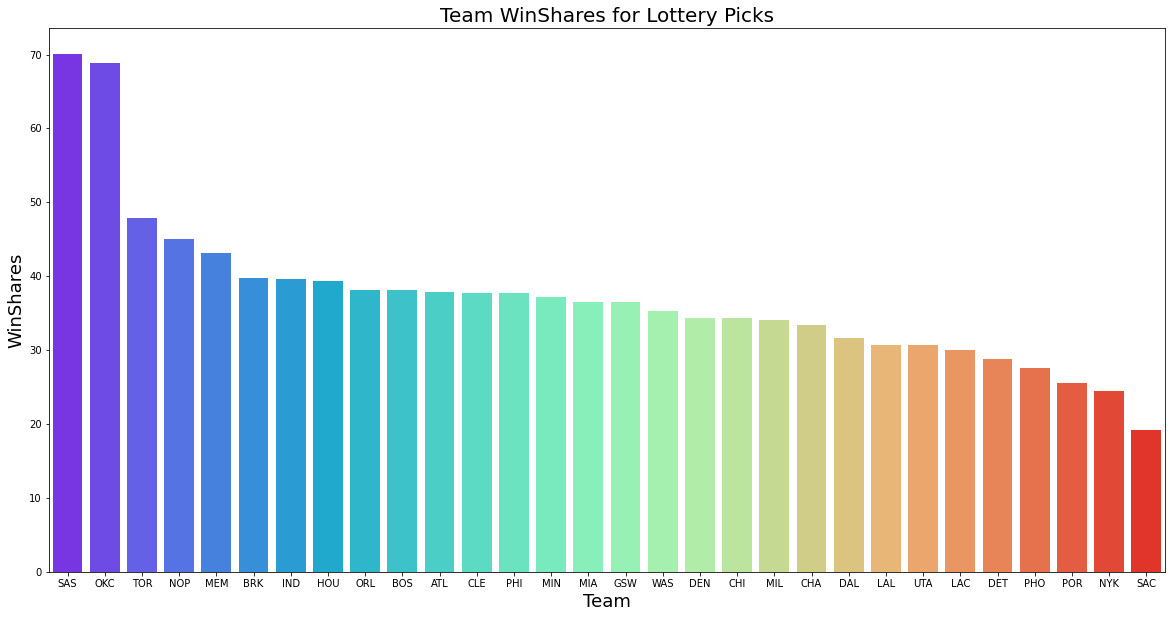

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x="Team", y="WinShares", data=grouped_lottery, palette="rainbow", ci=None).set_title("Team WinShares for Lottery Picks", fontdict={"size":20});
plt.xlabel("Team", fontsize=18) # x-label, changing size of axis label
plt.ylabel("WinShares", fontsize=18); # y-label, changing size of axis label

### Team WinShares Non-Lottery Picks

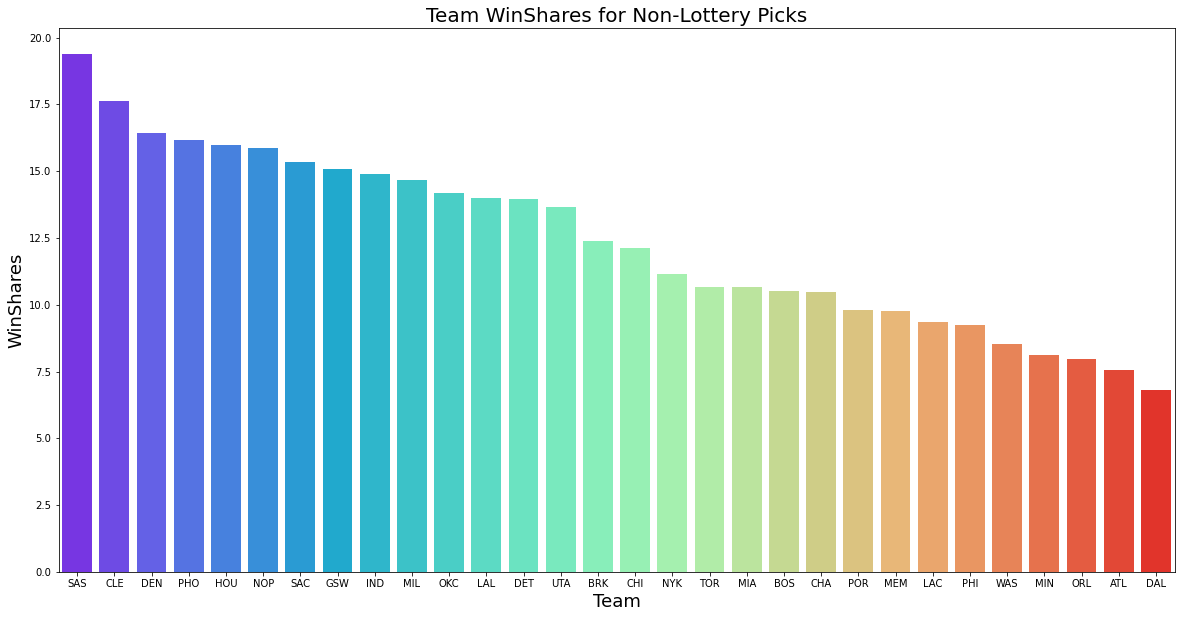

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x="Team", y="WinShares", data=grouped_non_lottery, palette="rainbow", ci=None).set_title("Team WinShares for Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Team", fontsize=18) # x-label, changing size of axis label
plt.ylabel("WinShares", fontsize=18); # y-label, changing size of axis label

I also wanted to see the average career points for lottery and non-lottery drafted players for each team:

### Average Points Lottery Picks for each NBA Team

In [26]:
grouped_pm_lottery = df2.groupby(["Team", "Lottery_Pick"])["Points"].mean().reset_index()

In [27]:
grouped_pm_lottery = grouped_pm_lottery.sort_values(by="Points", ascending=False)

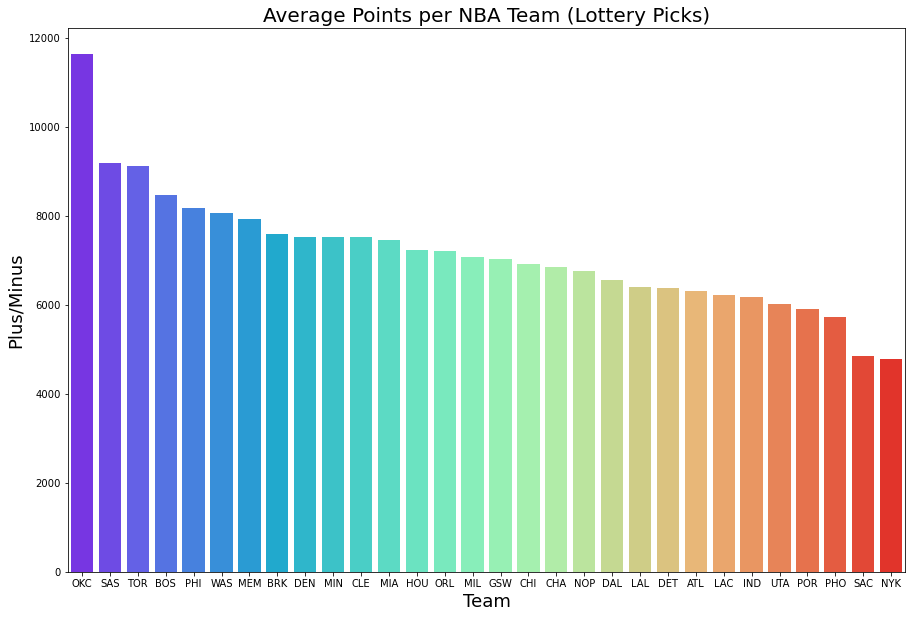

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x="Team", 
            y="Points", 
            data=grouped_pm_lottery, 
            palette="rainbow", 
            ci=None).set_title("Average Points per NBA Team (Lottery Picks)", fontdict={"size":20});
plt.xlabel("Team", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Plus/Minus", fontsize=18); # y-label, changing size of axis label

### Average Points Non-Lottery Picks NBA Team

In [29]:
grouped_pm_nonlottery = df3.groupby(["Team", "Lottery_Pick"])["Points"].mean().reset_index()

In [30]:
grouped_pm_nonlottery = grouped_pm_nonlottery.sort_values(by="Points", ascending=False)

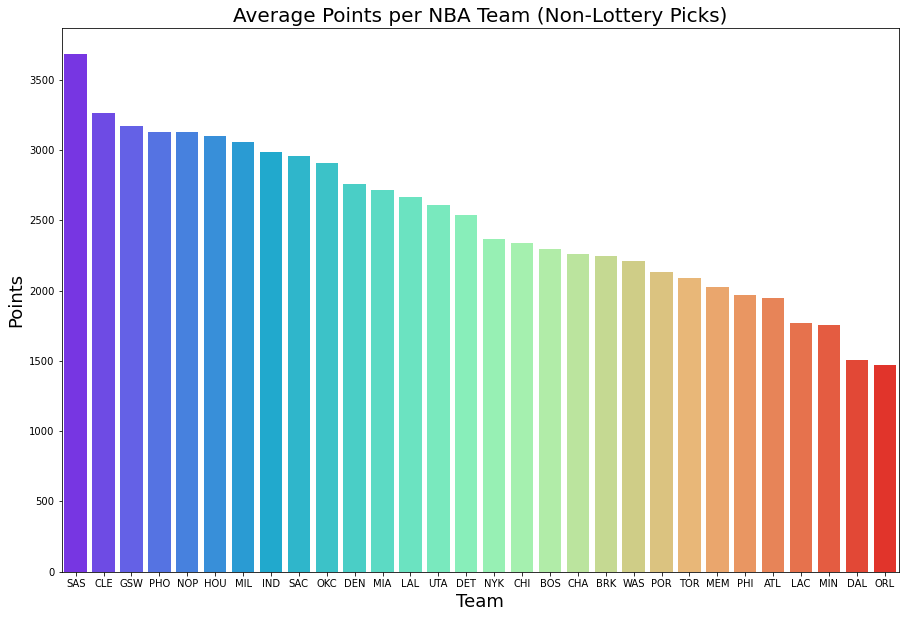

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x="Team", 
            y="Points", 
            data=grouped_pm_nonlottery, 
            palette="rainbow", ci=None).set_title("Average Points per NBA Team (Non-Lottery Picks)", fontdict={"size":20});
plt.xlabel("Team", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Points", fontsize=18); # y-label, changing size of axis label

## Break Down of Lottery/Non Lottery Players

Next I will explore lottery and non-lottery picks, seeking to find if there are substantial differences in terms of average total points scored, minutes played, field goal percentage, games played, plus/minus, total rebounds, and ultimately winshares.

### Average WinShares Lottery/Non-Lottery Players

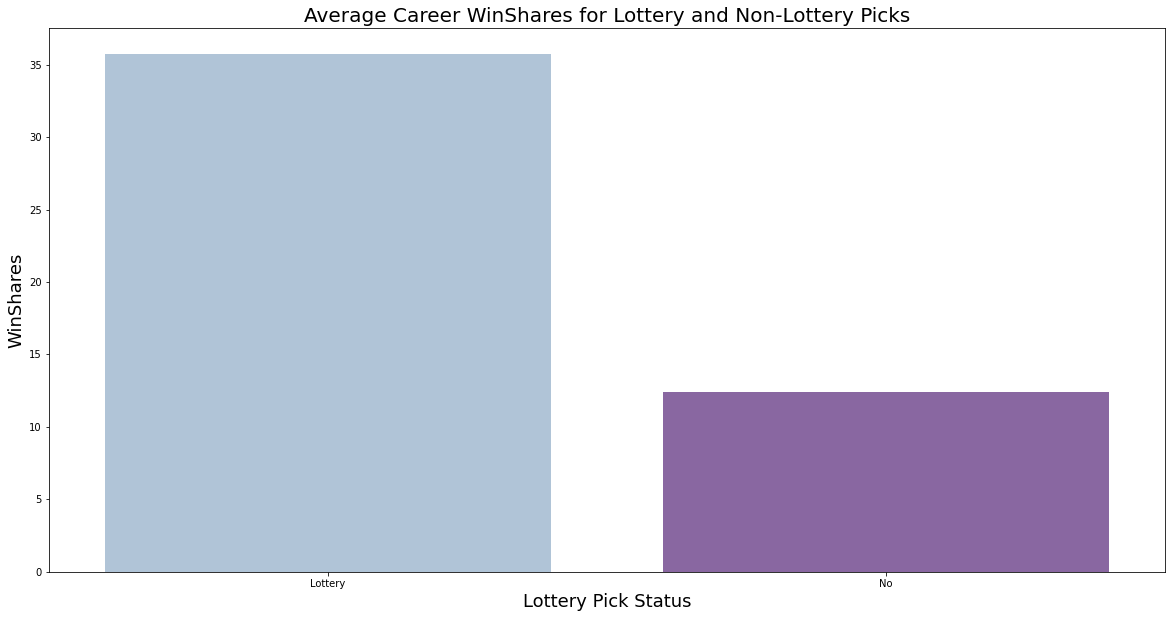

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="WinShares", data=fillna_new_df, palette='BuPu', ci=None).set_title("Average Career WinShares for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("WinShares", fontsize=18); # y-label, changing size of axis label

### Average Plus/Minus Lottery/Non-Lottery Players

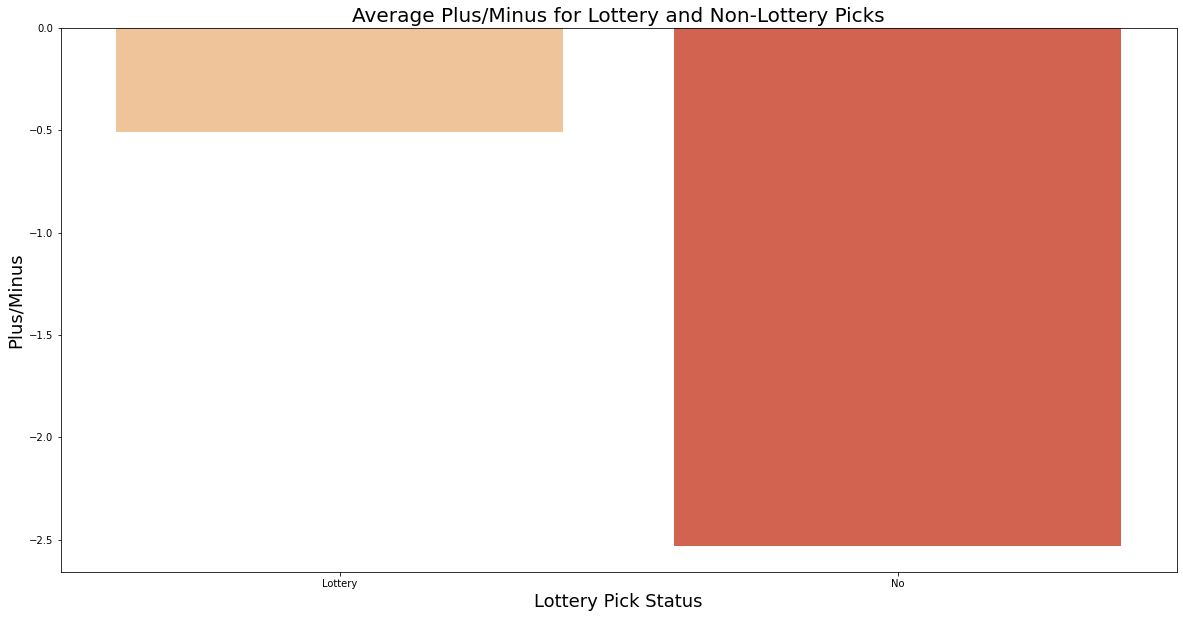

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Plus_Minus", data=fillna_new_df, palette='OrRd', ci=None).set_title("Average Plus/Minus for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Plus/Minus", fontsize=18); # y-label, changing size of axis label

### Average Career Total Points for Lottery and Non-Lottery Picks

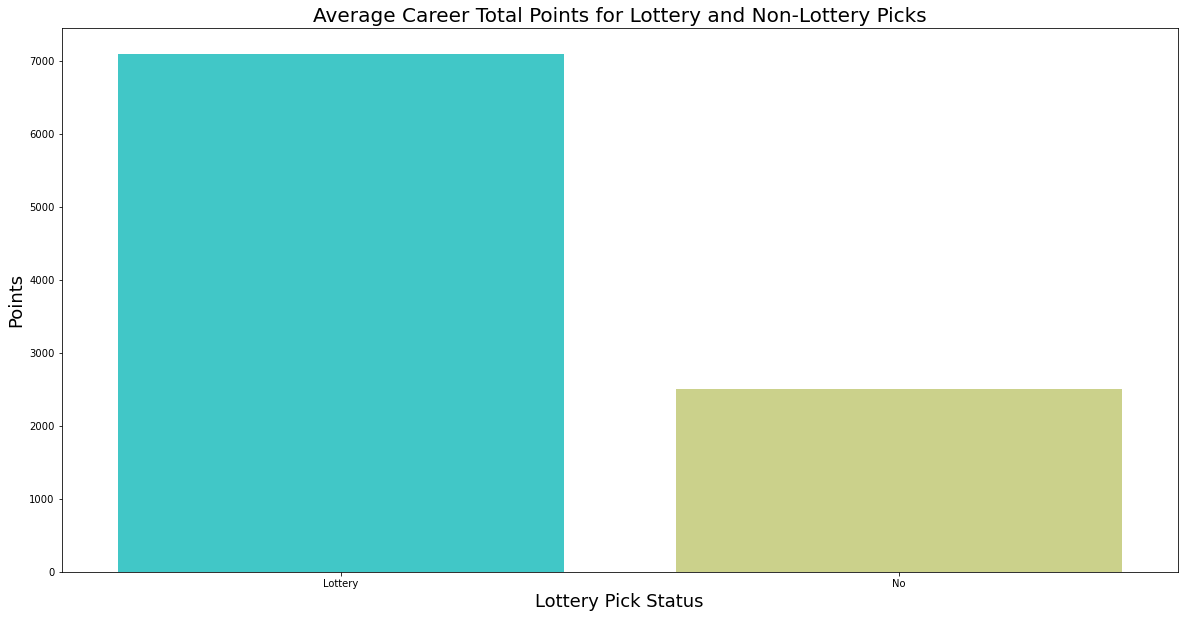

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Points", data=fillna_new_df, palette='rainbow', ci=None).set_title("Average Career Total Points for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Points", fontsize=18); # y-label, changing size of axis label

### Average Total Minutes Lottery/Non-Lottery Players

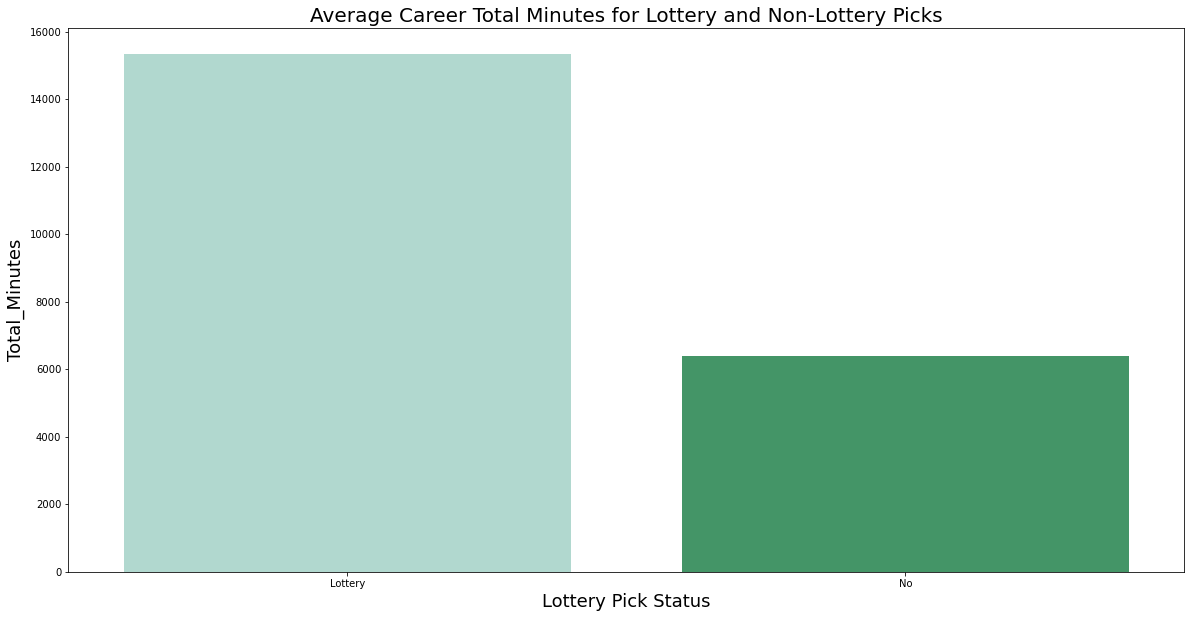

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Total_Minutes", data=fillna_new_df, palette='BuGn', ci=None).set_title("Average Career Total Minutes for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Total_Minutes", fontsize=18); # y-label, changing size of axis label

### Average Field Goal Percentage Lottery/Non-Lottery Players

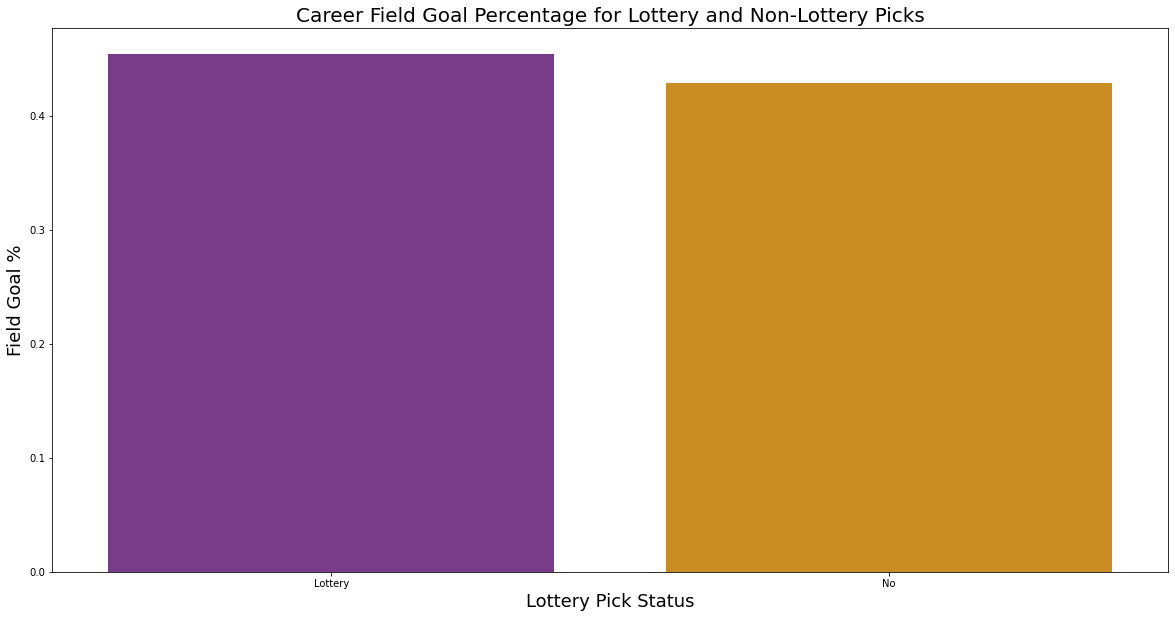

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Field_Goal_Pct", data=fillna_new_df, palette='CMRmap', ci=None).set_title("Career Field Goal Percentage for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Field Goal %", fontsize=18); # y-label, changing size of axis label

### Average Career Games Played Lottery/Non-Lottery Players

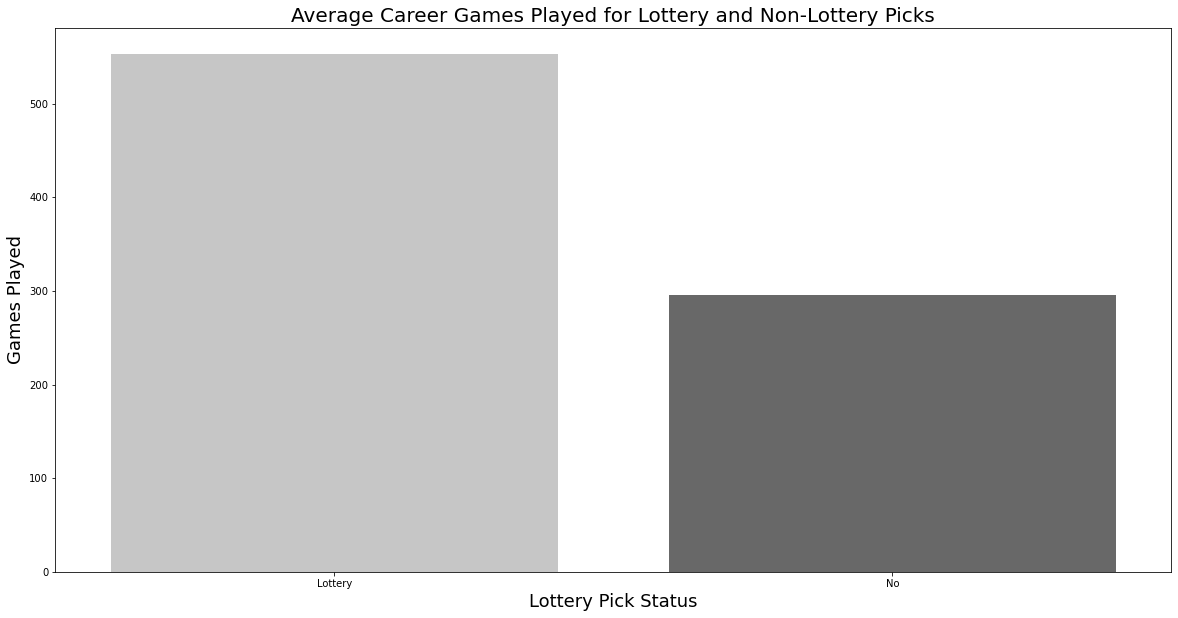

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Games Played", data=fillna_new_df, palette='Greys', ci=None).set_title("Average Career Games Played for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Games Played", fontsize=18); # y-label, changing size of axis label

### Average Total Rebounds Lottery/Non-Lottery Players

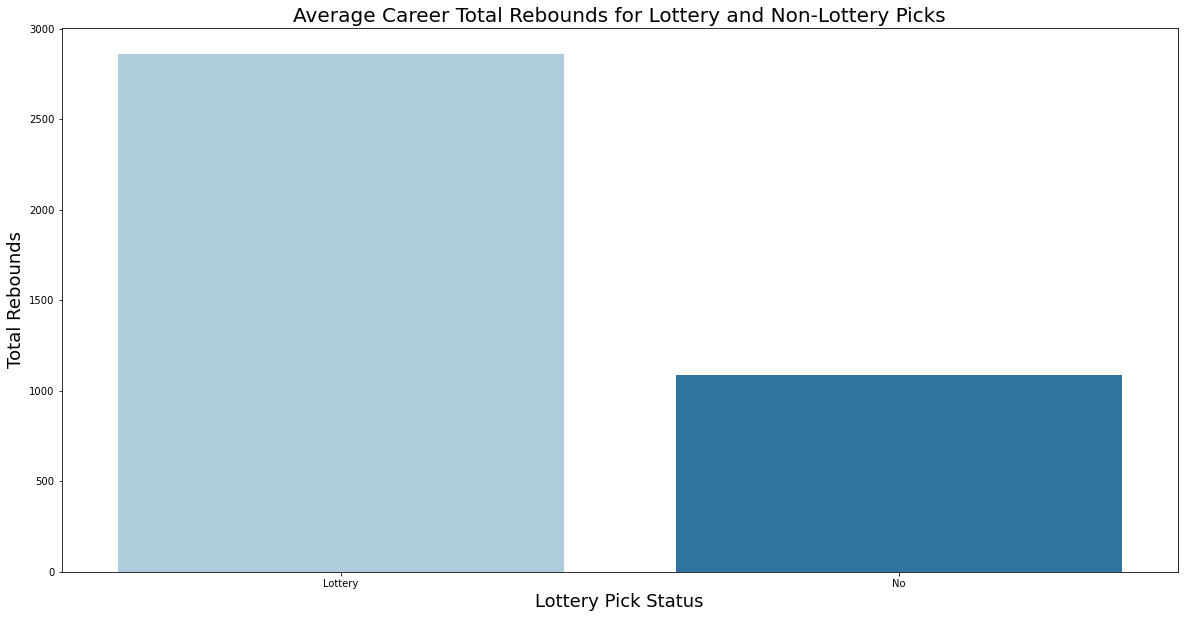

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x="Lottery_Pick", y="Total_Rebounds", data=fillna_new_df, palette='Paired', ci=None).set_title("Average Career Total Rebounds for Lottery and Non-Lottery Picks", fontdict={"size":20});
plt.xlabel("Lottery Pick Status", fontsize=18) # x-label, changing size of axis label
plt.ylabel("Total Rebounds", fontsize=18); # y-label, changing size of axis label

# Data Analysis

When evaluating lottery and non-lottery picks, there is a sizable gap in terms of performance and results. Lottery picks by far had higher averages in points, minutes, games played, total rebounds, WinShares, with slightly higher field goal percent averages. While both lottery and non-lottery picks had a negative plus/minus average, non-lottery picks were approximately 2 points worse. 

Comaparing each NBA team provided interesting insights. San Antonio Spurs and Oklahoma City Thunder had the highest WinShares among lottery picks, while the New York Knicks and Sacramento Kings had the lowest. Among non-lottery picks, Cleveland Cavaliers and San Antonio had the highest WinShares, with Atlanta Hawks and Dallas Mavericks having the lowest WinShares. In terms of average points, San Antonio was in the top 2 for both lottery and non-lottery picks. Oklahoma City was first in average points for lottery picks and 8th for non-lottery picks. The success of San Antonio in WinShares and high ranking in average points for both lottery and non-lottery picks suggests that their organization has been successful in player development overall. By comparison, Oklahoma City ranked 2nd in WinShares and 1st in average points for lottery picks, but ranked 10th in WinShares and 8th in average points for non-lottery picks. The Thunder has developed players who are lottery picks as well as San Antonio, but not as well developing players who are non-lottery picks. 

# Conclusion

The practice of "tanking" to obtain a lottery pick seems to be a reasonable approach given the discrepancy between players drafted in lottery and outside of the lottery. Players drafted in the lottery widely outperformed players drafted outside of the lottery. The WinShares of lottery-drafted players was almost triple that of non-lottery-drafted players. 

While players drafted in the lottery have had more success and produced more in the statistical categories used than non-lottery drafted players, the success of developing these players vary. With the exception of San Antonio, Oklahoma and the New Orleans Pelicans, no other team had a top-10 WinShare for both lottery and non-lottery drafted players. This suggests that while lottery-drafted players perform better, the teams that acquire these players must strengthen there player-development systems to ensure that their teams are winning at a higher rate. 

# References

https://www.basketball-reference.com/about/ws.html